In [65]:
import pandas as pd
import matplotlib.pyplot as mplot
import seaborn as sb
import numpy as np
import warnings

In [66]:
co2_data = pd.read_csv('CO2_per_year.csv')

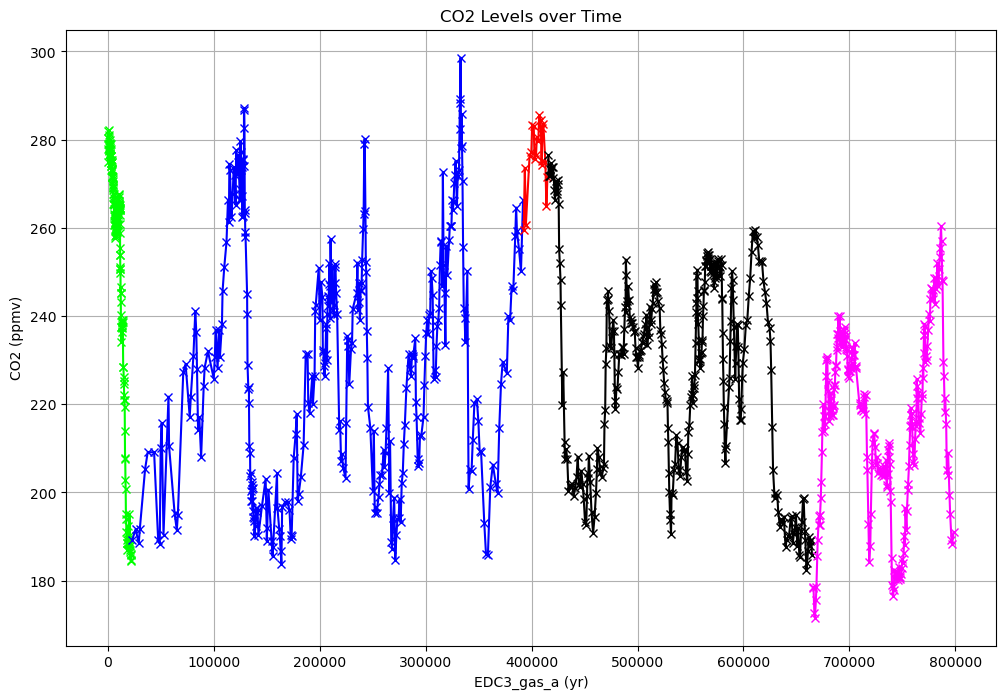

In [68]:
colors = {
    'Dome C (Monnin et al. 2001) measured at University of Bern': 'lime',
    'Vostok (Petit et al. 1999; Pepin et al. 2001; Raynaud et al. 2005) measured at LGGE in Grenoble': 'blue',
    'Dome C (Siegenthaler et al. 2005) measured at LGGE in Grenoble':'red',
    'Dome C (Siegenthaler et al. 2005)  measured at University of Bern':'black',
    'Dome C (Luethi et al. (sub)) measured at University of Bern':'fuchsia'
}

mplot.figure(figsize=(12, 8))
for source, color in colors.items():
    subset = co2_data[co2_data['source'] == source]
    mplot.plot(subset['EDC3_gas_a (yr)'], subset['CO2 (ppmv)'], marker='x', color=color)

mplot.xlabel('EDC3_gas_a (yr)')
mplot.ylabel('CO2 (ppmv)')
mplot.title('CO2 Levels over Time')
mplot.grid(True)
mplot.show()

In [74]:
temperature_data = pd.read_csv('temperature.csv')

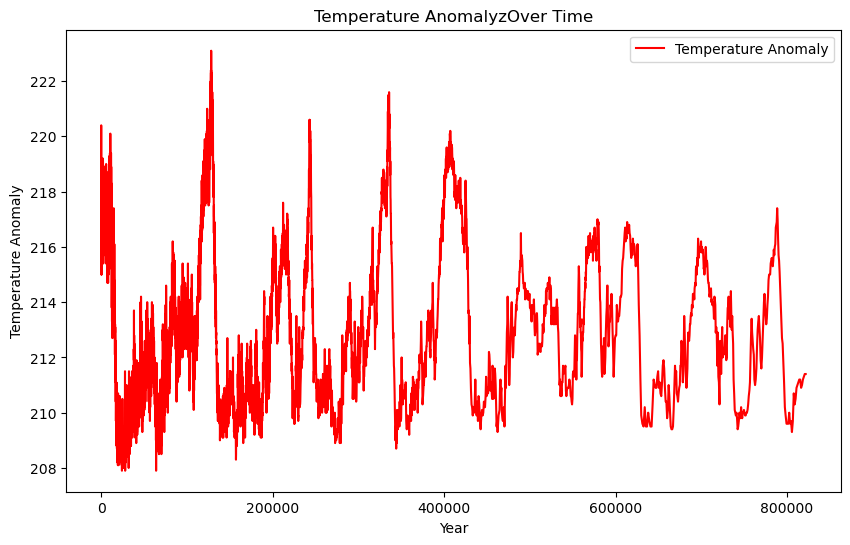

In [78]:
mplot.figure(figsize=(10, 6))

mplot.plot(temperature_data['AICC2012'], temperature_data['temp'], label='Temperature Anomaly', color='red')
mplot.xlabel('Year')
mplot.ylabel('Temperature Anomaly')
mplot.title('Temperature AnomalyzOver Time')
mplot.legend()
mplot.show()